In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

/tmp/ipykernel_1083358/3505785969.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [3]:
n = len(data)

In [4]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [5]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [6]:
denominator = n * sum_x2 - sum_x * sum_x

In [7]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [8]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [9]:
def model(x,m,b):
   return m * x + b

In [10]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [11]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*(len(data['GrLivArea'])//batch_size
```

Please plot your learning curve for different batch size, such as 64, 256, 1024, 4096. 

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*16
(64, 1e-7, 1e-1)*32
...
```

**How to submit your homework**
* Fork the github repo to your personal github 
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github. 

Follow the below instruction on how to do this: 
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

batch size: 32


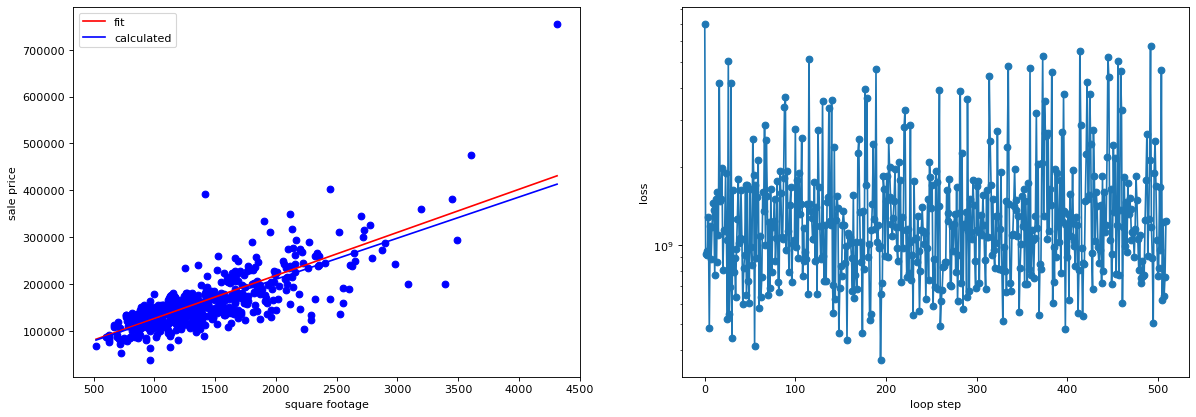

batch size: 64


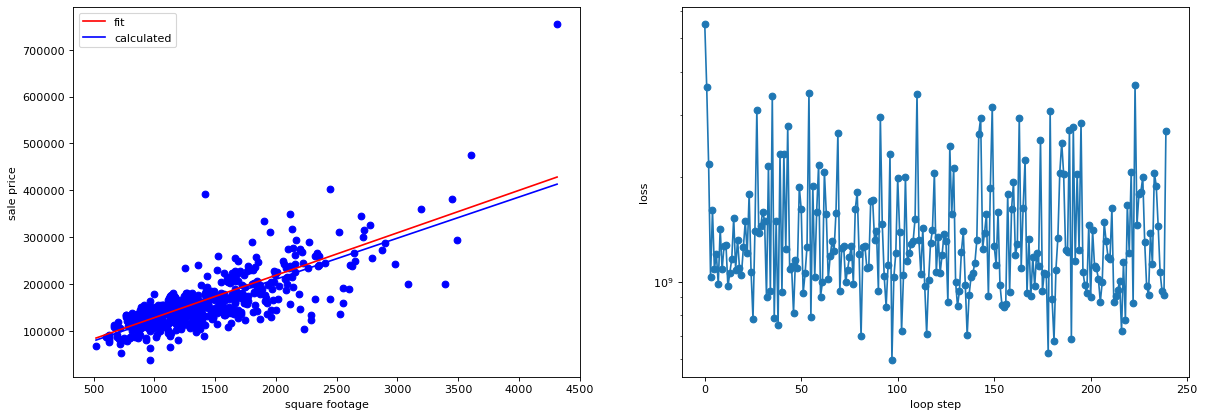

batch size: 128


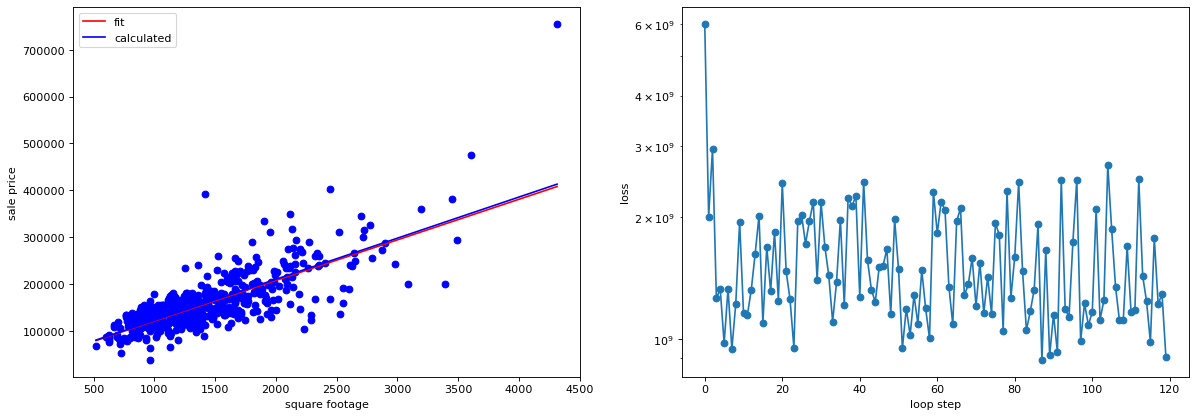

batch size: 256


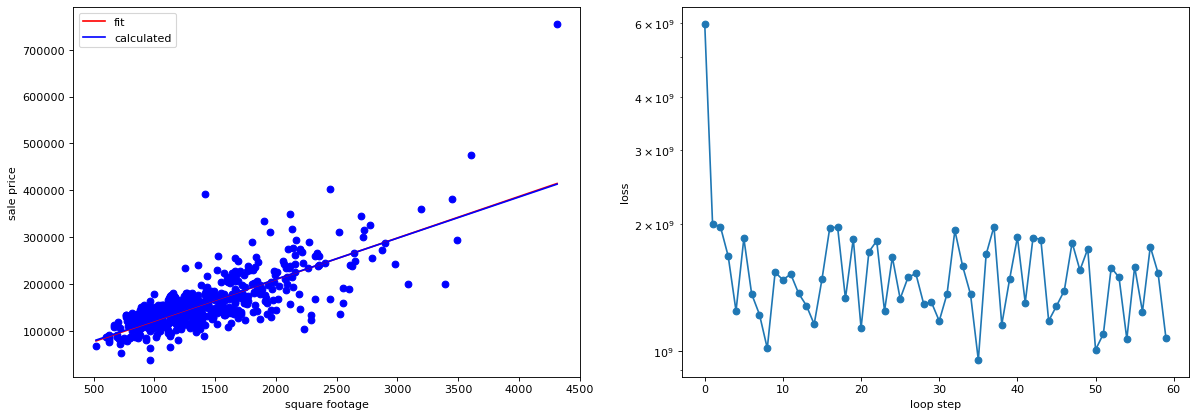

batch size: 512


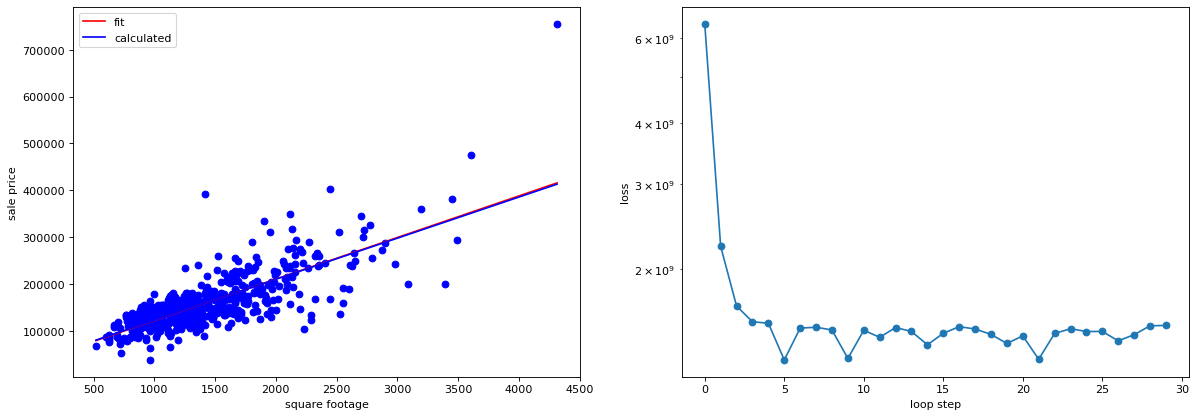

In [12]:
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"

for batch_size in [32, 64, 128, 256, 512]:
   # set our initial slope and intercept
   m = 5.
   b = 1000.

   # use these to plot our progress over time
   loss_history = []

   # we run our loop N times
   loop_N = 30 * (len(data['GrLivArea'])//batch_size)
   for i in range(loop_N):

      data_batch = data.sample(batch_size)
      data_x = data_batch['GrLivArea'].to_numpy()
      data_y = data_batch['SalePrice'].to_numpy()
      
      # update our slope and intercept based on the current values
      m = updated_m(data_x,data_y,m,b,learning_rate_m)
      b = updated_b(data_x,data_y,m,b,learning_rate_b)

      # calculate the loss value
      loss_value = np.mean(loss(data_x,data_y,m,b))

      # keep a history of our loss values
      loss_history.append(loss_value)
      
   print(f"batch size: {batch_size}")
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   
   # lot our usual output
   data_x = data['GrLivArea'].to_numpy()
   data_y = data['SalePrice'].to_numpy()
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()


